<a href="https://colab.research.google.com/github/bukhariaujih/KAU-training/blob/master/DME_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Install depedencies packages

# !pip install scikit-plot
# !pip install pillow
# !pip install scipy
# !pip install scikit-learn
# !apt-get update
# !apt-get upgrade -y
# !apt-get install -y libsm6 libxext6 libxrender-dev
# !pip install opencv-python==3.4.2.17

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
import imutils 
import scikitplot as skplt

import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

import numpy as np

In [0]:
# Load training data
data = './drive/My Drive/training_1/Data/image/data.npy'
target = './drive/My Drive/training_1/Data/image/target.npy'
data = np.load(data)
target = np.load(target)

data = np.squeeze(data, 3)
data = np.repeat(data[..., np.newaxis], 3, -1)


In [0]:
data.shape

(4096, 224, 224, 3)

In [0]:
def split_validation_set(train, target, test_size):
    random_state = 123
    X_train, X_test, y_train, y_test = train_test_split(train, 
                                                        target, 
                                                        test_size=test_size, 
                                                        random_state=random_state,
                                                        stratify=target)
    print('Split train: ', len(X_train))
    print('Split valid: ', len(X_test))
    return X_train, X_test, y_train, y_test

In [0]:
# Split training data 
X_train, X_test, Y_train, Y_test = split_validation_set(data, 
                                                        target, 
                                                        0.2)

Split train:  3276
Split valid:  820


In [0]:
# define model 


Using TensorFlow backend.
W0715 02:14:20.039704 139917888042880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 02:14:20.054841 139917888042880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 02:14:20.059462 139917888042880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 02:14:20.076017 139917888042880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0715 02:14:20.103935 1399178

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
__________

In [0]:
# training phase:

history = model.fit(X_train, Y_train, 
                    batch_size=32, 
                    epochs=20, 
                    verbose=1, 
                    validation_data=(X_test, Y_test),
                    shuffle=True)
model.save('/content/drive/My Drive/training_1/Code/image_medical/output/my_model.h5')

W0715 02:14:20.332870 139917888042880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3276 samples, validate on 820 samples
Epoch 1/20
3276/3276 [==============================] - 9s 3ms/step - loss: 0.5058 - acc: 0.7872 - val_loss: 0.1785 - val_acc: 0.9683
Epoch 2/20
3276/3276 [==============================] - 5s 2ms/step - loss: 0.1957 - acc: 0.9335 - val_loss: 0.2122 - val_acc: 0.9537
Epoch 3/20
3276/3276 [==============================] - 5s 2ms/step - loss: 0.1544 - acc: 0.9716 - val_loss: 0.0352 - val_acc: 0.9915
Epoch 4/20
3276/3276 [==============================] - 5s 2ms/step - loss: 0.1164 - acc: 0.9777 - val_loss: 0.0605 - val_acc: 0.9890
Epoch 5/20
3276/3276 [==============================] - 5s 2ms/step - loss: 0.0364 - acc: 0.9866 - val_loss: 0.0161 - val_acc: 0.9963
Epoch 6/20
3276/3276 [==============================] - 5s 2ms/step - loss: 0.2530 - acc: 0.9777 - val_loss: 0.0107 - val_acc: 0.9976
Epoch 7/20
3276/3276 [==============================] - 5s 2ms/step - loss: 0.0532 - acc: 0.9927 - val_loss: 0.0209 - val_acc: 0.9963
Epoch 8/20
3276

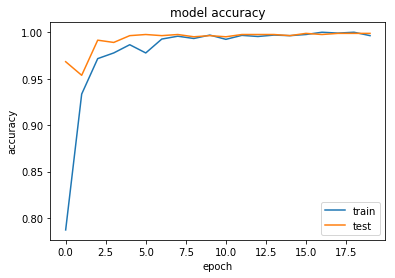

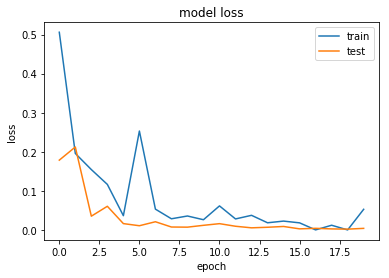

In [0]:
# Model performance evaluation:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
# Load trained network
model = load_model('/content/drive/My Drive/training_1/Code/image_medical/output/my_model.h5')

In [0]:
# Do prediction on test data
Y_pred=model.predict([X_test])

In [0]:
Y_pred.shape, Y_test.shape

((820, 2), (820, 2))

In [0]:
# Performance report:

target_names = ["normal", "dme"]
print(classification_report(np.argmax(Y_test, axis=1), 
                            np.argmax(Y_pred, axis=1), 
                            target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       410
         dme       1.00      1.00      1.00       410

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


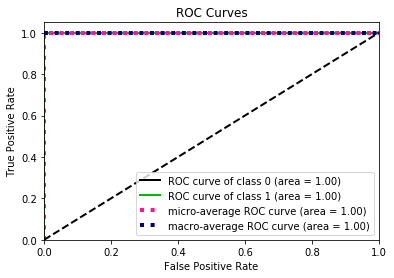

In [0]:
# Plot roc curve:

skplt.metrics.plot_roc_curve(np.argmax(Y_test, axis=1), Y_pred)
plt.show()

In [0]:
# Show confusion matrix
confusion_matrix(np.argmax(Y_test,axis=1), 
                 np.argmax(Y_pred,axis=1))


array([[410,   0],
       [  1, 409]])

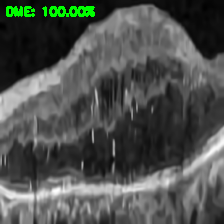

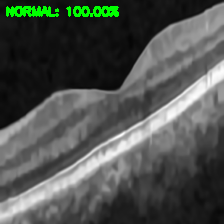

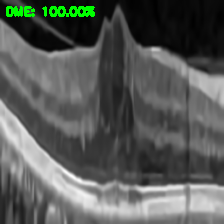

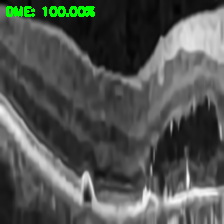

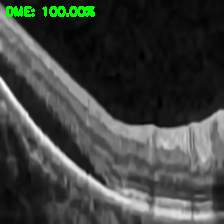

In [0]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# draw the label on the image
for i in range(5):
  # classify the input image
  (normal, dme) = model.predict(X_test)[i]
  label = "NORMAL" if normal > dme else "DME"
  proba = dme if dme > normal else normal
  label = "{}: {:.2f}%".format(label, proba * 100)
  
  image = (X_test[i] * 255).round().astype(np.uint8)
  cv2.putText(image, label, (5, 15),  cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)
  
  # show the output image
  cv2_imshow(image)
  

In [0]:
Predicted = np.argmax(Y_pred[:30],axis=1) 
Predicted

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0])

In [0]:
GroundTruth = np.argmax(Y_test[:30],axis=1)
GroundTruth

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0])

In [0]:
GroundTruth == Predicted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])